<AxesSubplot:title={'center':'stock price'}, xlabel='Date'>

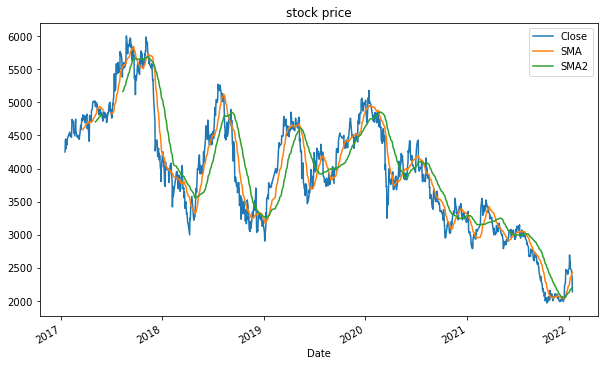

In [1]:
#載入所需套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#載入過去五年大立光的股價資料
Data = pd.read_csv(r'C:\Users\npc94\OneDrive\桌面\3008.TW.csv',index_col=0,parse_dates=True)

#使用兩條不同時間的均線策略
Data['SMA']=Data['Close'].rolling(20).mean()
Data['SMA2']=Data['Close'].rolling(50).mean()

#對過去的股價和兩條均線進行繪圖
Data[['Close','SMA','SMA2']].plot(figsize=(10,6),title='stock price')

<AxesSubplot:title={'center':'Market positioning'}, xlabel='Date'>

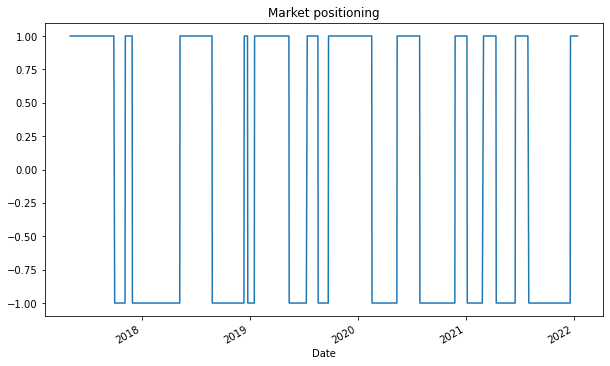

In [2]:
#策略制定，短天均線穿過長天均線即作多，反之則進行放空

Data['position']=np.where(Data['SMA']>Data['SMA2'],1,-1)
Data.dropna(inplace=True)

#對交易部位變化進行繪圖
Data['position'].plot(ylim=[-1.1,1.1],title='Market positioning',figsize=(10,6))

<AxesSubplot:title={'center':'return compare'}, xlabel='Date'>

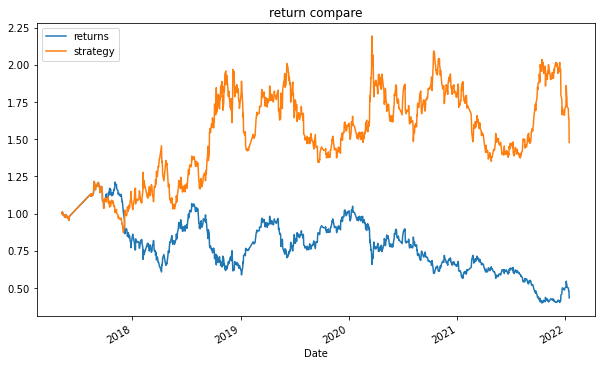

In [3]:
#計算策略的報酬

Data['returns']=np.log(Data['Close']/Data['Close'].shift(1))
Data['strategy']=Data['position'].shift(1)*Data['returns']
Data[['returns','strategy']].sum()
Data[['returns','strategy']].sum().apply(np.exp)

#比較策略的報酬和單純買進個股並持有的報酬
Data[['returns','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6),title='return compare')

In [4]:
#計算策略的年化報酬

Data[['returns','strategy']].mean()*252

returns    -0.191416
strategy    0.089582
dtype: float64

In [5]:
#計算策略的風險

Data[['returns','strategy']].std()

returns     0.027459
strategy    0.027467
dtype: float64

0.8424789849444276

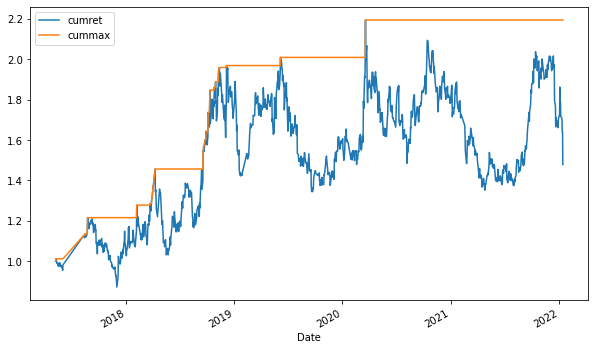

In [7]:
#計算策略的最大回檔

Data['cumret']=Data['strategy'].cumsum().apply(np.exp)
Data['cummax']=Data['cumret'].cummax()
Data[['cumret','cummax']].dropna().plot(figsize=(10,6))
drawdown = Data['cummax']-Data['cumret']
drawdown.max()

In [8]:
#計算回檔持續的天數

temp = drawdown[drawdown ==0]
periods = (temp.index[1:].to_pydatetime()-temp.index[:-1].to_pydatetime())
periods.max()

datetime.timedelta(days=287)